In [110]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve


In [111]:
read_in_df = pd.read_csv('../Data/expanded_clean.csv', index_col=0)
main_df = read_in_df.copy()
transformed_df = pd.DataFrame()

In [112]:
main_df

class cap-shape cap-surface cap-color bruises?      odor  \
0        EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES    ALMOND   
1        EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES    ALMOND   
2        EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES    ALMOND   
3        EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES    ALMOND   
4        EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES    ALMOND   
5        EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES    ALMOND   
6        EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES     ANISE   
7        EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES     ANISE   
8        EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES     ANISE   
9        EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES     ANISE   
10       EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES     ANISE   
11       EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES     ANISE   
12       EDIBLE    CONVEX      SMOOTH    YELLOW  BRUISES    ALMOND   
13       EDIBLE    CONVEX      SMOOTH    YELLOW  BRUISES    ALMOND   
14       EDIBLE    CONVEX      SMOOTH    YELLOW  BRUISES    ALMOND   
15       EDIBLE    CONVEX      SMOOTH    YELLOW  BRUISES    ALMOND   
16       EDIBLE    CONVEX      SMOOTH    YELLOW  BRUISES    ALMOND   
17       EDIBLE    CONVEX      SMOOTH    YELLOW  BRUISES    ALMOND   
18       EDIBLE    CONVEX      SMOOTH    YELLOW  BRUISES     ANISE   
19       EDIBLE    CONVEX      SMOOTH    YELLOW  BRUISES     ANISE   
20       EDIBLE    CONVEX      SMOOTH    YELLOW  BRUISES     ANISE   
21       EDIBLE    CONVEX      SMOOTH    YELLOW  BRUISES     ANISE   
22       EDIBLE    CONVEX      SMOOTH    YELLOW  BRUISES     ANISE   
23       EDIBLE    CONVEX      SMOOTH    YELLOW  BRUISES     ANISE   
24       EDIBLE    CONVEX     FIBROUS     WHITE  BRUISES    ALMOND   
25       EDIBLE    CONVEX     FIBROUS     WHITE  BRUISES    ALMOND   
26       EDIBLE    CONVEX     FIBROUS     WHITE  BRUISES    ALMOND   
27       EDIBLE    CONVEX     FIBROUS     WHITE  BRUISES    ALMOND   
28       EDIBLE    CONVEX     FIBROUS     WHITE  BRUISES    ALMOND   
29       EDIBLE    CONVEX     FIBROUS     WHITE  BRUISES    ALMOND   
30       EDIBLE    CONVEX     FIBROUS     WHITE  BRUISES     ANISE   
31       EDIBLE    CONVEX     FIBROUS     WHITE  BRUISES     ANISE   
32       EDIBLE    CONVEX     FIBROUS     WHITE  BRUISES     ANISE   
33       EDIBLE    CONVEX     FIBROUS     WHITE  BRUISES     ANISE   
34       EDIBLE    CONVEX     FIBROUS     WHITE  BRUISES     ANISE   
35       EDIBLE    CONVEX     FIBROUS     WHITE  BRUISES     ANISE   
36       EDIBLE    CONVEX     FIBROUS    YELLOW  BRUISES    ALMOND   
37       EDIBLE    CONVEX     FIBROUS    YELLOW  BRUISES    ALMOND   
38       EDIBLE    CONVEX     FIBROUS    YELLOW  BRUISES    ALMOND   
39       EDIBLE    CONVEX     FIBROUS    YELLOW  BRUISES    ALMOND   
40       EDIBLE    CONVEX     FIBROUS    YELLOW  BRUISES    ALMOND   
41       EDIBLE    CONVEX     FIBROUS    YELLOW  BRUISES    ALMOND   
42       EDIBLE    CONVEX     FIBROUS    YELLOW  BRUISES     ANISE   
43       EDIBLE    CONVEX     FIBROUS    YELLOW  BRUISES     ANISE   
44       EDIBLE    CONVEX     FIBROUS    YELLOW  BRUISES     ANISE   
45       EDIBLE    CONVEX     FIBROUS    YELLOW  BRUISES     ANISE   
46       EDIBLE    CONVEX     FIBROUS    YELLOW  BRUISES     ANISE   
47       EDIBLE    CONVEX     FIBROUS    YELLOW  BRUISES     ANISE   
48       EDIBLE      FLAT      SMOOTH     WHITE  BRUISES    ALMOND   
49       EDIBLE      FLAT      SMOOTH     WHITE  BRUISES    ALMOND   
50       EDIBLE      FLAT      SMOOTH     WHITE  BRUISES    ALMOND   
51       EDIBLE      FLAT      SMOOTH     WHITE  BRUISES    ALMOND   
52       EDIBLE      FLAT      SMOOTH     WHITE  BRUISES    ALMOND   
53       EDIBLE      FLAT      SMOOTH     WHITE  BRUISES    ALMOND   
54       EDIBLE      FLAT      SMOOTH     WHITE  BRUISES     ANISE   
55       EDIBLE      FLAT      SMOOTH     WHITE  BRUISES     ANISE   
56       EDIBLE     

# Data Cleaning
Convert columns to booleans where appropriate

In [113]:
main_df['bruises?'].unique()

array(['BRUISES', 'NO'], dtype=object)

In [114]:
# Bruises? is a binary variable (BRUISES/NO) so we can convert it to a boolean
transformed_df['bruises?'] = main_df['bruises?'] == 'BRUISES'

In [115]:
ring_number_map = {"ONE": 1, "TWO": 2, "NONE": 0}
transformed_df['ring-number'] = main_df['ring-number'].map(ring_number_map)

In [116]:
# Print out the unique values for each column
for col in main_df.columns:
    print(col, main_df[col].unique())
    

class ['EDIBLE' 'POISONOUS']
cap-shape ['CONVEX' 'FLAT' 'BELL' 'SUNKEN' 'KNOBBED' 'CONICAL']
cap-surface ['SMOOTH' 'FIBROUS' 'SCALY' 'GROOVES']
cap-color ['WHITE' 'YELLOW' 'BROWN' 'GRAY' 'RED' 'PINK' 'PURPLE' 'GREEN' 'BUFF'
 'CINNAMON']
bruises? ['BRUISES' 'NO']
odor ['ALMOND' 'ANISE' 'NONE' 'PUNGENT' 'CREOSOTE' 'FOUL' 'FISHY' 'SPICY'
 'MUSTY']
gill-attachment ['FREE' 'ATTACHED']
gill-spacing ['CROWDED' 'CLOSE']
gill-size ['NARROW' 'BROAD']
gill-color ['WHITE' 'PINK' 'BROWN' 'GRAY' 'BLACK' 'CHOCOLATE' 'PURPLE' 'GREEN' 'RED'
 'BUFF' 'YELLOW' 'ORANGE']
stalk-shape ['TAPERING' 'ENLARGING']
stalk-root ['BULBOUS' 'CLUB' 'ROOTED' 'EQUAL' '?']
stalk-surface-above-ring ['SMOOTH' 'FIBROUS' 'SILKY' 'SCALY']
stalk-surface-below-ring ['SMOOTH' 'SCALY' 'FIBROUS' 'SILKY']
stalk-color-above-ring ['WHITE' 'PINK' 'GRAY' 'BUFF' 'BROWN' 'RED' 'CINNAMON' 'YELLOW' 'ORANGE']
stalk-color-below-ring ['WHITE' 'PINK' 'GRAY' 'BUFF' 'BROWN' 'RED' 'YELLOW' 'CINNAMON' 'ORANGE']
veil-type ['PARTIAL']
veil-color ['WH

In [117]:
transformed_df['poisonous'] = main_df['class'] == 'POISONOUS'

In [118]:
non_categorical = set(['poisionous', 'bruises?', 'ring-number', 'class'])
categorical = set(main_df.columns) - non_categorical

In [119]:
# Generate dummmy variables for each of the categorical variables
for col in categorical:
    transformed_df = pd.concat([transformed_df, 
                                pd.get_dummies(main_df[col], prefix=col, drop_first=True)], 
                                axis=1)

In [120]:
# Print data about the dataset
print(f'Number of rows: {len(main_df)}')
print(f'Number of columns: {len(main_df.columns)}')
print(f'Number of poisonous mushrooms: {len(main_df[transformed_df["poisonous"]])}')
print(f'Number of edible mushrooms: {len(main_df[~transformed_df["poisonous"]])}')

Number of rows: 8416
Number of columns: 23
Number of poisonous mushrooms: 3928
Number of edible mushrooms: 4488


In [121]:
# Print all rows of the dataset
pd.set_option('display.max_rows', None)
main_df.describe()

class cap-shape cap-surface cap-color bruises?  odor gill-attachment  \
count     8416      8416        8416      8416     8416  8416            8416   
unique       2         6           4        10        2     9               2   
top     EDIBLE    CONVEX       SCALY     BROWN       NO  NONE            FREE   
freq      4488      3796        3268      2320     5040  3808            8200   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8416      8416       8416  ...                     8416   
unique            2         2         12  ...                        4   
top           CLOSE     BROAD       BUFF  ...                   SMOOTH   
freq           6824      5880       1728  ...                     5076   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8416                   8416      8416       8416   
unique                      9                      9         1          4   
top                     WHITE                  WHITE   PARTIAL      WHITE   
freq                     4744                   4640      8416       8216   

       ring-number ring-type spore-print-color population habitat  
count         8416      8416              8416       8416    8416  
unique           3         5                 9          6       7  
top            ONE   PENDANT             WHITE    SEVERAL   WOODS  
freq          7768      3968              2424       4064    3160  

[4 rows x 23 columns]

In [122]:
# Print number of rows with missing values (NaN or '?')
# Convert '?' to NaN
main_df = main_df.replace('?', np.nan)
# Print columns with missing values and the number of missing values
print("Columns with missing values and number of missing values:")
print(main_df.isnull().sum()[main_df.isnull().sum() > 0])

Columns with missing values and number of missing values:
stalk-root    2480
dtype: int64


<AxesSubplot:>

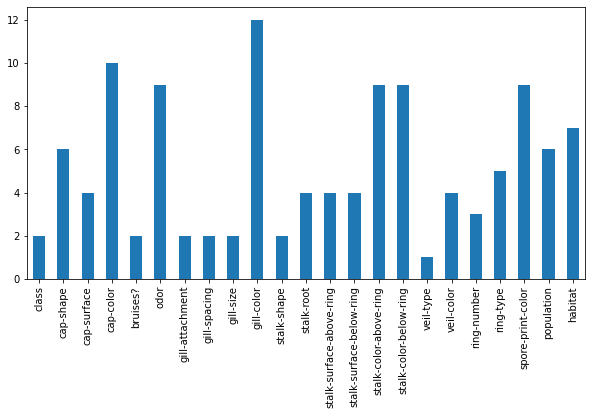

In [124]:
# make a bar plot of the number of unique values in each column
main_df.nunique().plot(kind='bar', figsize=(10, 5))

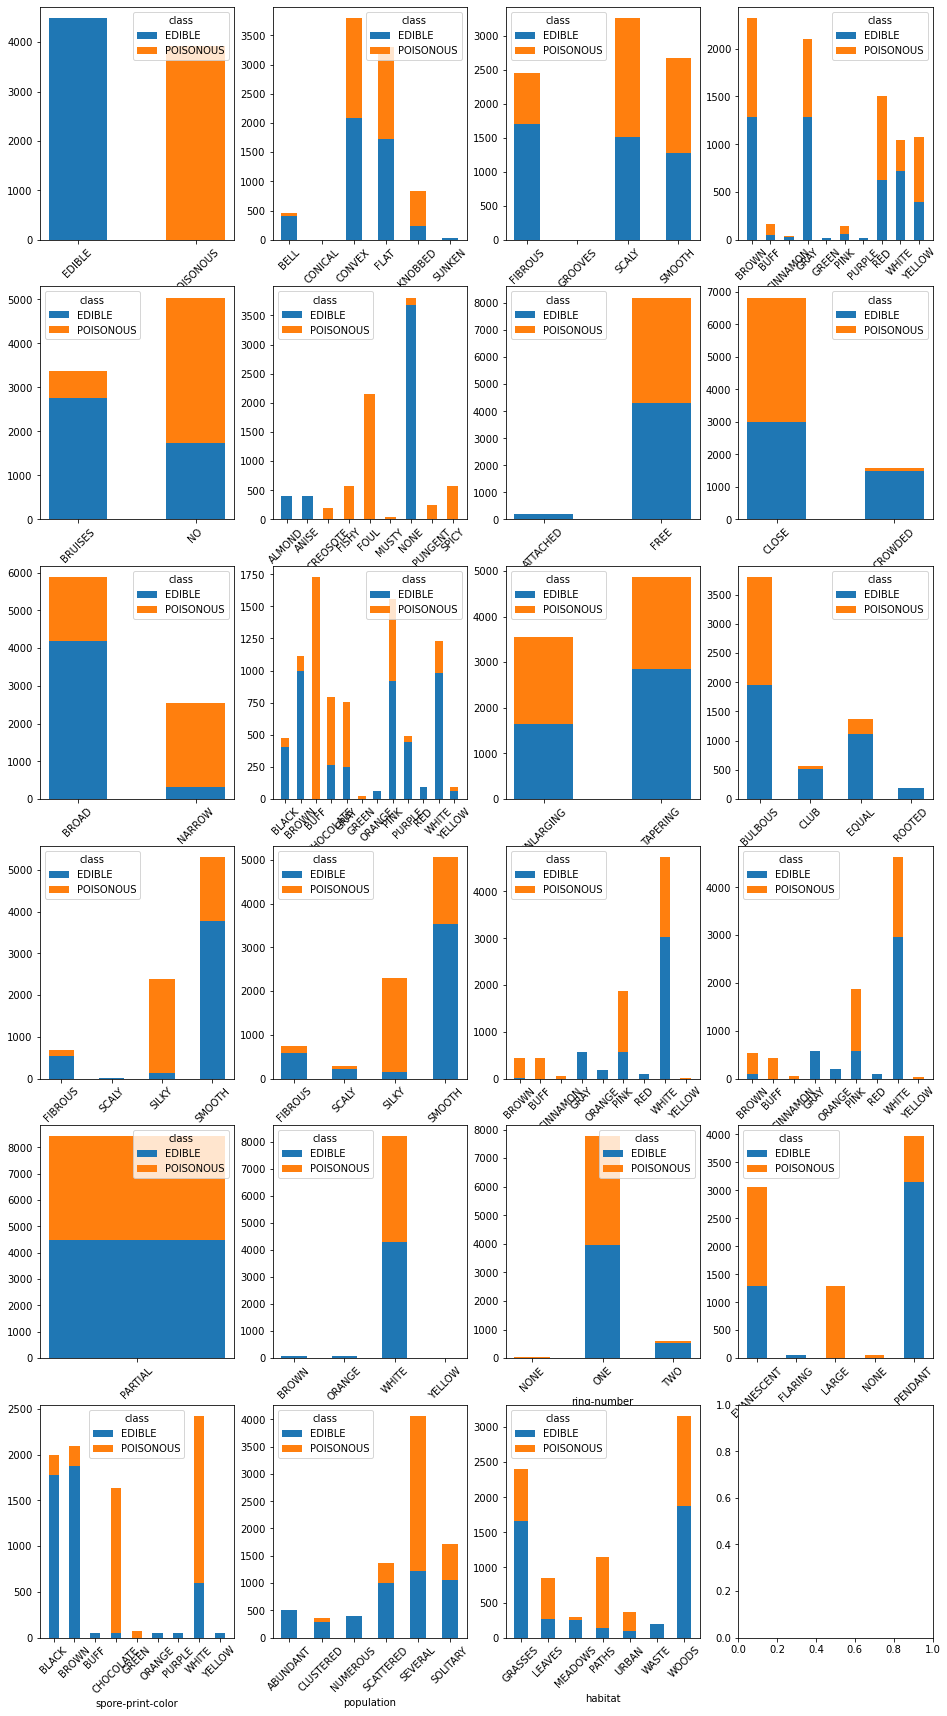

In [144]:
# Make a bar plot of the distribution of unique values for each column
# Within each bar, poisonous mushrooms are shown in red, while edible mushrooms are shown in blue
# Stack the bars on top of each other

num_cols = len(main_df.columns)

num_graph_cols = 4
num_graph_rows = int(np.ceil(num_cols / num_graph_cols))

fig, axs = plt.subplots(num_graph_rows, num_graph_cols, figsize=(16, num_graph_rows * 5))

for col in main_df.columns:
    main_df.groupby(col)['class'].value_counts().unstack().plot(kind='bar', stacked=True, ax=axs.flat[main_df.columns.get_loc(col)])
    # turn the axis labels 45 degrees
    axs.flat[main_df.columns.get_loc(col)].tick_params(axis='x', rotation=45)
    # Set axes tight
    axs.flat[main_df.columns.get_loc(col)].axis('tight')

## Odor analysis
Appears that odor will be a strong predictor

In [145]:
main_df['odor'].value_counts()

NONE        3808
FOUL        2160
FISHY        576
SPICY        576
ALMOND       400
ANISE        400
PUNGENT      256
CREOSOTE     192
MUSTY         48
Name: odor, dtype: int64

In [147]:
# For each odor value, print the number of poisonous and edible mushrooms
main_df.groupby('odor')['class'].value_counts()

odor      class    
ALMOND    EDIBLE        400
ANISE     EDIBLE        400
CREOSOTE  POISONOUS     192
FISHY     POISONOUS     576
FOUL      POISONOUS    2160
MUSTY     POISONOUS      48
NONE      EDIBLE       3688
          POISONOUS     120
PUNGENT   POISONOUS     256
SPICY     POISONOUS     576
Name: class, dtype: int64

According to the above figure, mushrooms with almond or anise odors will always be edible. Mushrooms with no odor tend to be edible. All other odors tend to be poisonous. This is a strong predictor.